# Introducción a la librería Scikit-Learn


El proposito de este notebook es describir una de las librerías más usadas dentro de las comunidad de Data Scientists y científicos de diferentes ramas de estudio.  

Es una de las librerías con más documentación y ejemplos disponibles, usada masivamente por la comunidad cientifica

Scikit-learn es una librería de Python que nos brinda una amplio rango de algoritmos supervisados y no supervisados en un interfaz estable.

Esta librería está enfocada en "modelización de datos". No es de gran utilidad a la hora de cargar, manipular o procesar datos. Para esto último están disponibles NumPy y Pandas

Algunos de los puntos que trataremos en este notebook : 

- **Clustering**: for grouping unlabeled data such as KMeans.
- **Cross Validation**: for estimating the performance of supervised models on unseen data.
- **Datasets**: for test datasets and for generating datasets with specific properties for investigating model behavior.
- **Ensemble methods**: for combining the predictions of multiple supervised models.
- **Feature selection**: for identifying meaningful attributes from which to create supervised models.
- **Parameter Tuning**: for getting the most out of supervised models.
- **Supervised Models**: a vast array not limited to generalized linear models, naive bayes, lazy methods, and decision trees.


'http://scikit-learn.org/stable/tutorial/basic/tutorial.html' Aquí teneis disponible un tutorial con más información

In [6]:
# En este bloque de código vamos a importar las librerias necesarias para trabajar con SciKit-Learn
import sklearn
from sklearn import datasets

boston = datasets.load_boston()


In [7]:
X = boston.data
X.shape

(506, 13)

In [8]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
import pandas as pd
df = pd.DataFrame(X, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
y = boston.target
y.shape # an array of 506 numbers

(506,)

In [12]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [13]:
df['PRICE'] = y
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


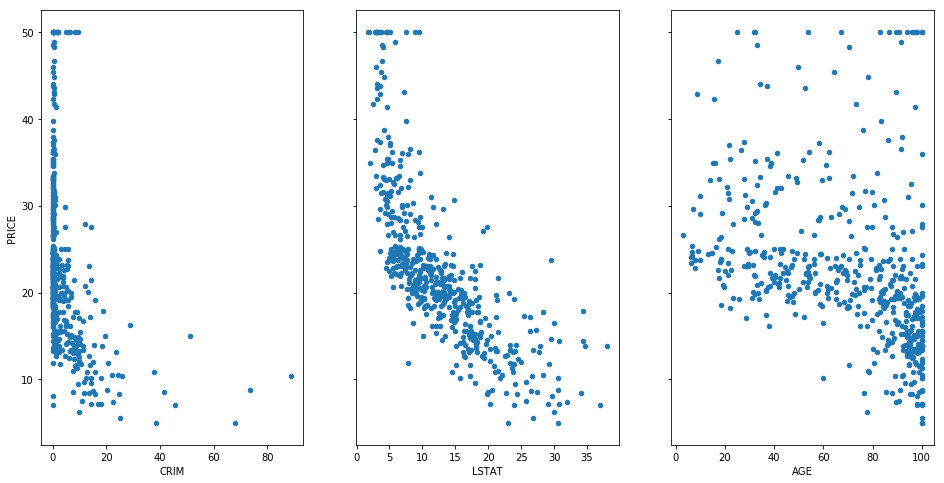

In [15]:
import matplotlib.pyplot as plt

# visualize the relationship between the features and the response using scatterplots# visua 
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='CRIM', y='PRICE', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='LSTAT', y='PRICE', ax=axs[1])
df.plot(kind='scatter', x='AGE', y='PRICE', ax=axs[2])
plt.show()

In [16]:
df.corr().shape

(14, 14)

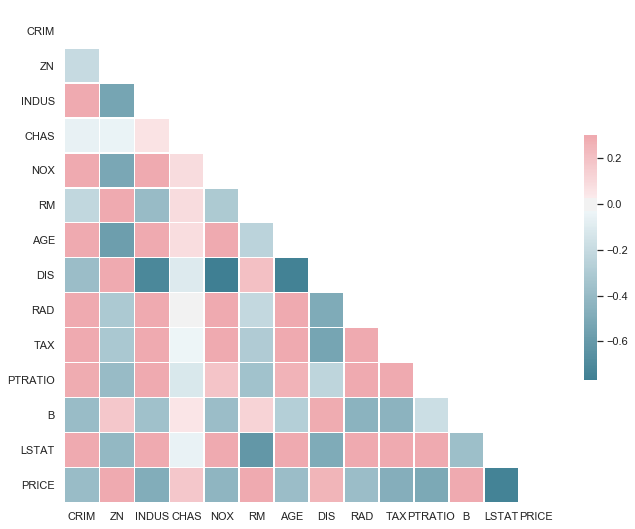

In [17]:
import numpy as np
import seaborn as sns

sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool) # Return an array of zeros with the same shape and type as a given array
mask[np.triu_indices_from(mask)] = True # Return the indices for the upper-triangle of arr

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# REGRESION LINEAL

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
x = df.RM
y = df.PRICE

df1 = pd.DataFrame(data={'RM':x, 'PRICE':y})
df1 = df1[['RM','PRICE']]
df1.reset_index(inplace=True)
df1.head()

,index,RM,PRICE
0,0,6.575,24.0
1,1,6.421,21.6
2,2,7.185,34.7
3,3,6.998,33.4
4,4,7.147,36.2


C:\Users\iteofil1\.conda\envs\launchpad\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


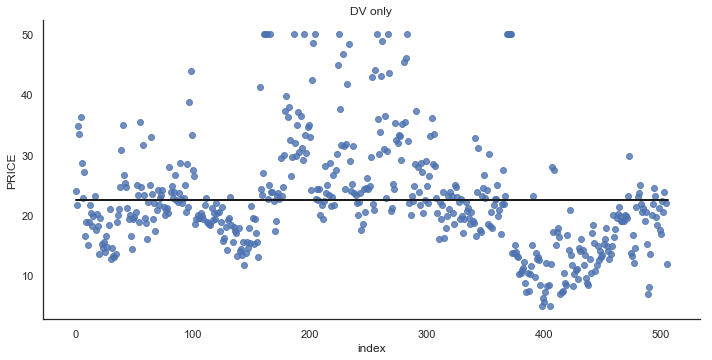

Mean: 22.532806324110698


In [21]:
df2 = df1.copy()

y_bar = np.mean(df.PRICE)

# Create plot
sns.lmplot(x='index', y='PRICE', data=df2, size=5, aspect=2, fit_reg=False)
# Create mean trendline
plt.plot([0, df2.shape[0]], [y_bar, y_bar], 'k-', lw=2)
plt.title("DV only")
# Show plot
plt.show()

print(f'Mean: {y_bar}')

In [22]:
y_sum = np.sum(df2.PRICE)

df2['Error'] = df2.PRICE.apply(lambda y: y - y_bar)
df2['Error_sq'] = df2.Error.apply(lambda e: e**2)

sse = np.sum(df2.Error_sq)

df2.head()

,index,RM,PRICE,Error,Error_sq
0,0,6.575,24.0,1.467194,2.152657
1,1,6.421,21.6,-0.932806,0.870128
2,2,7.185,34.7,12.167194,148.040602
3,3,6.998,33.4,10.867194,118.095898
4,4,7.147,36.2,13.667194,186.792183


C:\Users\iteofil1\.conda\envs\launchpad\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


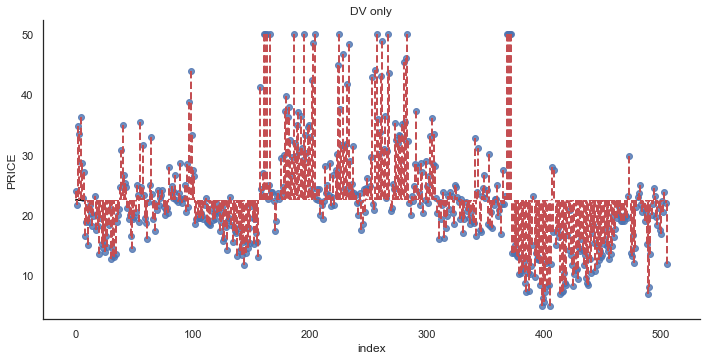

mean of all values of y: 22.532806
sum of all values of y: 11401.600000
sum of squared error (SSE): 42716.295415


In [23]:
# Create plot
sns.lmplot(x='index', y='PRICE', data=df2, size=5, aspect=2, fit_reg=False)
# Create mean trendline
plt.plot([0, 7], [y_bar, y_bar], 'k-', lw=2)
# Create residual lines
for i, val in enumerate(df2.PRICE):
    plt.plot([i, i], [val, y_bar], 'r--', lw=2)
# Create title
plt.title("DV only")
# Show plot
plt.show()

print('mean of all values of y: %f' % y_bar)
print('sum of all values of y: %f' % y_sum)
print('sum of squared error (SSE): %f' % sse)

In [24]:
# UNIVARIATE LINEAR REGRESSION

In [25]:
df3 = df1.copy()
df3.head()

,index,RM,PRICE
0,0,6.575,24.0
1,1,6.421,21.6
2,2,7.185,34.7
3,3,6.998,33.4
4,4,7.147,36.2


C:\Users\iteofil1\.conda\envs\launchpad\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


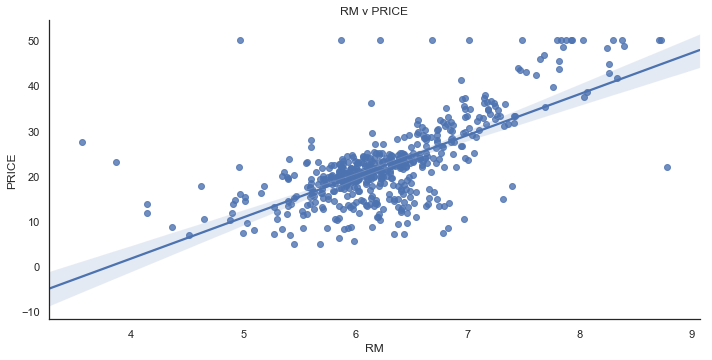

In [26]:
# Create plot to visualize the relationship between the feature and targets
# The shaded area represents the 95% confidence interval of the line
sns.lmplot(x='RM', y='PRICE', data=df3, size=5, aspect=2)
plt.title("RM v PRICE")
# Show plot
plt.show()

In [27]:
x_bar = np.mean(df3.RM)
y_bar = np.mean(df3.PRICE)

x_bar, y_bar

(6.284634387351787, 22.532806324110698)

In [28]:
df3['Xdiff'] = df3.RM.apply(lambda x: x - x_bar)
df3['Ydiff'] = df3.PRICE.apply(lambda y: y - y_bar)
df3['Xdiff_Ydiff'] = df3.Xdiff.multiply(df3.Ydiff)
df3['Xdiff2'] = df3.Xdiff.apply(lambda x: x**2)

b1_num = np.sum(df3.Xdiff_Ydiff)
b1_den = np.sum(df3.Xdiff2)

print('beta1 numerator: %f' % b1_num)
print('beta1 denominator: %f' % b1_den)

df3.head()

beta1 numerator: 2269.190169
beta1 denominator: 249.303779


,index,RM,PRICE,Xdiff,Ydiff,Xdiff_Ydiff,Xdiff2
0,0,6.575,24.0,0.290366,1.467194,0.426023,0.084312
1,1,6.421,21.6,0.136366,-0.932806,-0.127203,0.018596
2,2,7.185,34.7,0.900366,12.167194,10.954923,0.810658
3,3,6.998,33.4,0.713366,10.867194,7.752282,0.508890
4,4,7.147,36.2,0.862366,13.667194,11.786118,0.743674


In [29]:
def linear_regression(x, num, den, x_bar, y_bar):
  b1 = num/den
  b0 = y_bar - (b1*x_bar)
  
  return b1, b0, np.add(np.multiply(b1, x), b0)

In [30]:
b1, b0, df3['Y_hat'] = linear_regression(df3.RM, b1_num, b1_den, x_bar, y_bar) 
df3['Error'] = df3.PRICE.subtract(df3.Y_hat)
df3['Error_sq'] = df3.Error.apply(lambda e: e**2)
print('y_hat = %fx + %f' % (b1, b0))
df3.head()

y_hat = 9.102109x + -34.670621


,index,RM,PRICE,Xdiff,Ydiff,Xdiff_Ydiff,Xdiff2,Y_hat,Error,Error_sq
0,0,6.575,24.0,0.290366,1.467194,0.426023,0.084312,25.175746,-1.175746,1.382378
1,1,6.421,21.6,0.136366,-0.932806,-0.127203,0.018596,23.774021,-2.174021,4.726367
2,2,7.185,34.7,0.900366,12.167194,10.954923,0.810658,30.728032,3.971968,15.776528
3,3,6.998,33.4,0.713366,10.867194,7.752282,0.508890,29.025938,4.374062,19.132419
4,4,7.147,36.2,0.862366,13.667194,11.786118,0.743674,30.382152,5.817848,33.847354


In [31]:
min_sse = np.sum(df3.Error_sq)

print('minimized SSE: %f' % min_sse)

minimized SSE: 22061.879196


In [32]:
# AHORA COMPARAMOS EL EJERCICIO ANTERIOR CON SKLEARN

In [33]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

df4 = df2.copy().drop(['Error', 'Error_sq'], axis=1)

In [34]:
X = df4.RM
X = X.values.reshape(-1, 1)
Y = df4.PRICE
Y = Y.values.reshape(-1, 1)

In [35]:
linreg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
from sklearn.model_selection import cross_validate

result = cross_validate(linreg, X, Y, cv=3, return_train_score=False, scoring='neg_mean_squared_error')
-result['test_score'].mean()

62.92680486497932

In [37]:
train = df4.sample(frac=.5)
test = df4[~df4.index.isin(train.index)]

In [38]:
linreg.coef_

array([[9.10210898]])

In [39]:
pred = linreg.predict(X)

In [40]:
df4['Y_hat'] = pred
df4['manual_Y_hat'] = df3['Y_hat']
df4.head()

,index,RM,PRICE,Y_hat,manual_Y_hat
0,0,6.575,24.0,25.175746,25.175746
1,1,6.421,21.6,23.774021,23.774021
2,2,7.185,34.7,30.728032,30.728032
3,3,6.998,33.4,29.025938,29.025938
4,4,7.147,36.2,30.382152,30.382152


In [41]:
linreg.coef_[0][0], b1, linreg.intercept_[0], b0

(9.10210898118031, 9.10210898118031, -34.67062077643857, -34.67062077643861)

In [42]:
(b0 + b1 * df4.RM[0]), (linreg.intercept_ + linreg.coef_ * df4.RM[0])

(25.175745774821927, array([[25.17574577]]))

In [43]:
from sklearn.metrics import mean_squared_error

man_mse = min_sse/len(df3.PRICE)
sk_mse = mean_squared_error(df4.PRICE, df4.Y_hat)

# Manual mean squared error
print("Manual Mean squared error: %f" % man_mse)

# Sklearn mean squared error
print("Sklearn Mean squared error: %f" % sk_mse)

Manual Mean squared error: 43.600552
Sklearn Mean squared error: 43.600552


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lr = LinearRegression()

In [46]:
lr.fit(X, y)
prediction = lr.predict(X)

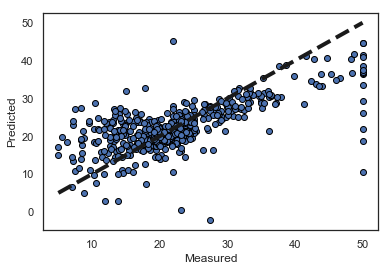

43.60055177116956

In [47]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(y, prediction, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], 
        [y.min(), y.max()], 
        'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

mse = mean_squared_error(y, prediction)
mse

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

In [50]:
# Verifies if condition is true
assert X_train.shape[0] + X_test.shape[0] == X.shape[0]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((339, 1), (339,), (167, 1), (167,))

In [51]:
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)

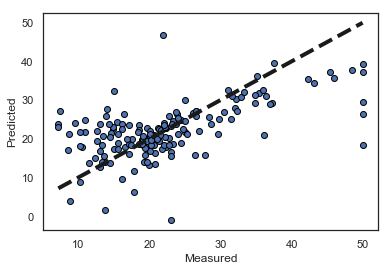

56.921557382108965

In [52]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], 
        [y_test.min(), y_test.max()], 
        'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

mse = mean_squared_error(y_test, prediction)
mse

In [53]:
lr.score(X_test, y_test)

0.33857445788930346